# Homework 4
### Aakef Waris

## Recitation Exercises

In [1]:
## Helper functions for recitation
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def prob_one_init_centroid(k_clusters=1, n=10):
    return math.factorial(k_clusters) * (n**k_clusters) / ((k_clusters*n) ** k_clusters)

def SSE_CLUSTER(datapoints, centroid):
    def dim(data):    
        if type(data) == int or type(data) == float:
            return 1
        else:
            return len(data)
    
    space = dim(centroid)
    ERROR = 0
    for pt in datapoints:
        if dim(pt) != space:
            break
        
        elif space == 1:
                ERROR = (centroid-space)**2
        else:
            ERROR += sum([(attr-center)**2 for attr, center in (pt, centroid)])
    return ERROR

def cluster_purity(counts, total):
    return max([count/total for count in counts])

def cluster_entropy(counts, total):
    vals = []
    for count in counts:
        if count != 0:
            vals.append((count/total) * math.log(count/total, 2))
    return -1*sum(vals)

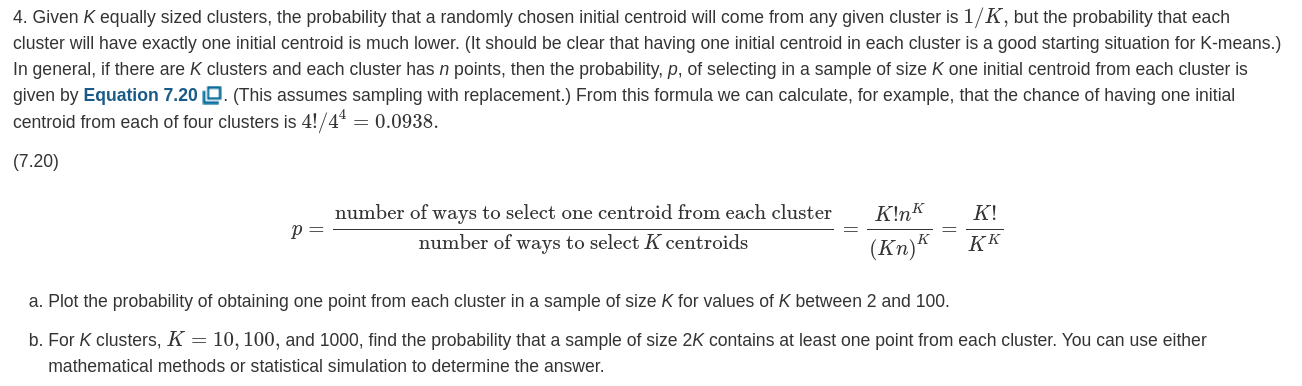

### a)

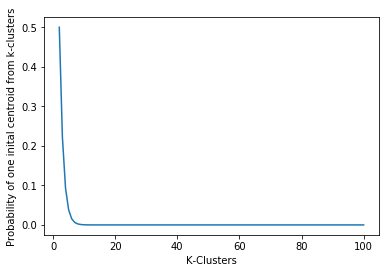

In [2]:
results = pd.DataFrame([(k, prob_one_init_centroid(k_clusters=k)) for k in range(2, 101)])
results.columns = ["K_Clusters", "Probability"]
plt.xlabel("K-Clusters")
plt.ylabel("Probability of one inital centroid from k-clusters")
plt.plot(results["K_Clusters"], results["Probability"])

### b)

In [3]:
k_sizes = [10, 100, 1000]
probabilities = [(k, prob_one_init_centroid(k_clusters=k, n=2*k)) for k in k_sizes]
print(probabilities)

[(10, 0.00036288), (100, 9.332621544394415e-43), (1000, 0.0)]


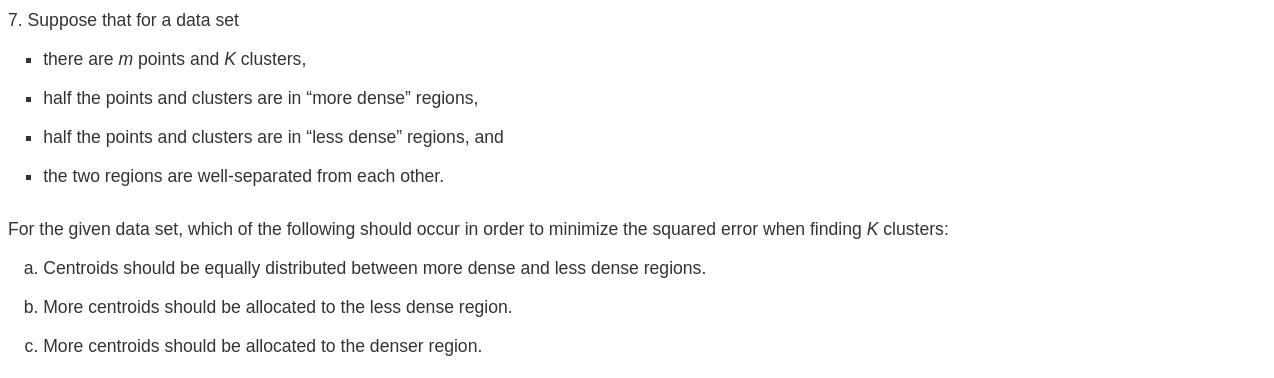

**B**: more centroids should be allocated in the less dense region becuase, there is "more area to cover" when trying to minimize the distance from each point to it's corresponding, centroid. In the more dense area you do not need as many centroids, becuase the data objects are already so close together, you could minimize the distance from the points to their centroids with fewer centroids.

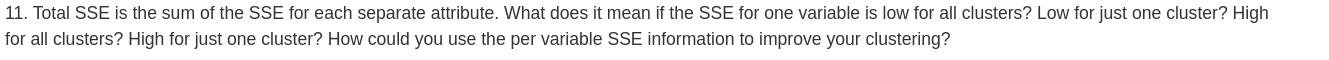

- If the SSE for any one variable is low for every cluster, this really doesn't have any meaning, becuase it is like a constant. 
- If the SSE is low for only ONE cluster, this means it is a defining attribute of the cluster (helpful)
- High SSE for all clusters, essentially means that it is noise, and has no affect on the resulting clusters
- High for one cluster means, it doesn't say much about the cluster itself.
- We want to elimnate varibales that either don't tell us anything by being constant for a specific cluster or varibales that have high SSE everywhere which is essentially noise, this best features are those that have high SSE for few clusters

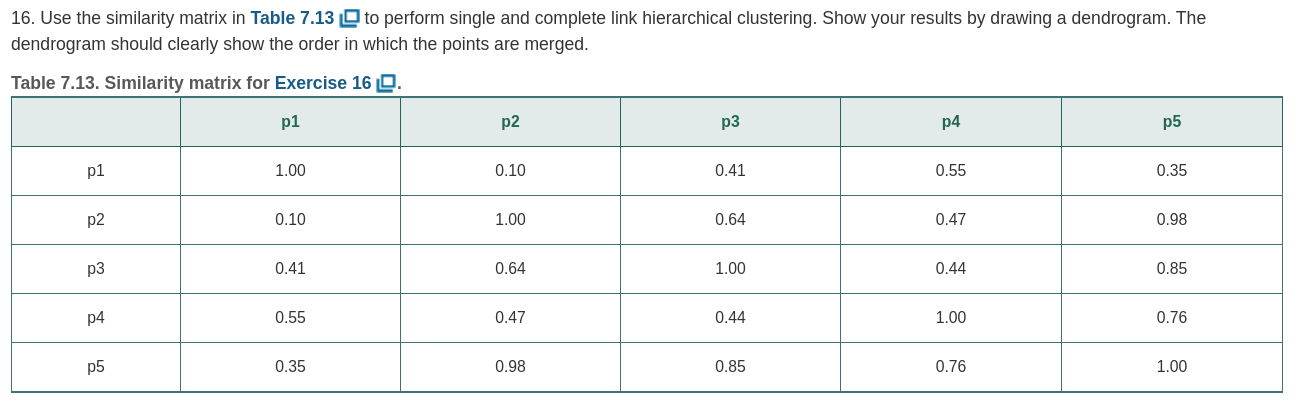

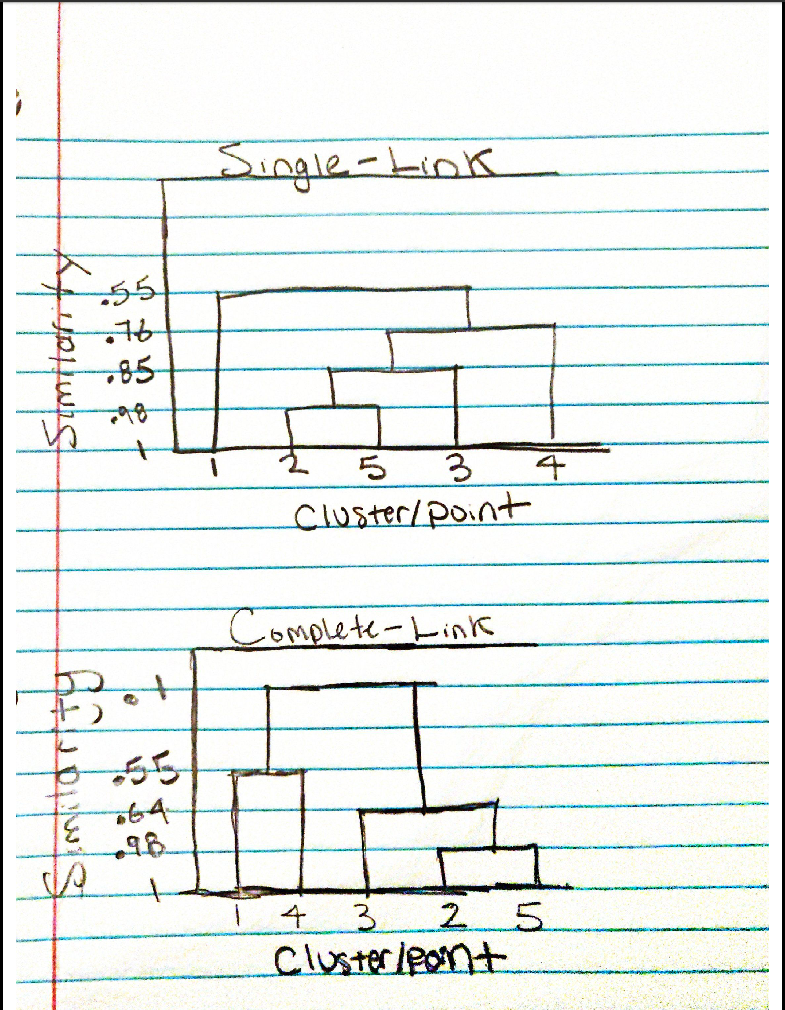

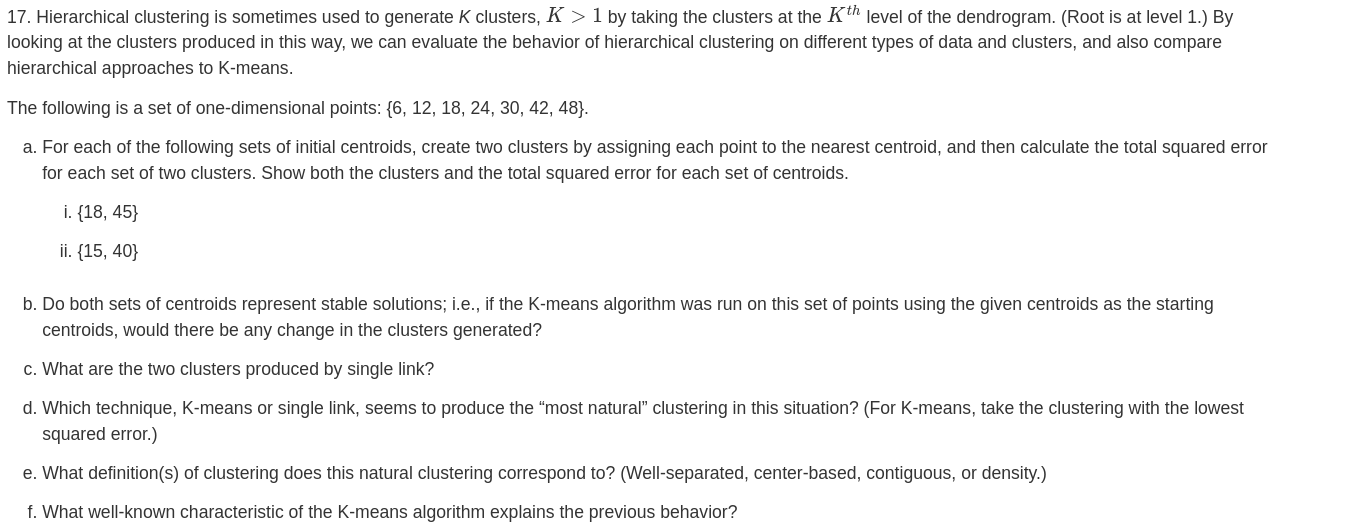

### a)

In [4]:
datapoints = [6, 12, 18, 24, 30, 42, 48]

## i)
clusters_i = {
    18:datapoints[0:5],
    45:datapoints[5::]
}

## ii)
clusters_ii = {
    15:datapoints[0:4],
    40:datapoints[4::]
}

print("I)\n")
print(clusters_i)
TOTAL_SSE_I = 0
for centroid, cluster in clusters_i.items():
    sse = SSE_CLUSTER(cluster, centroid)
    print("CLUSTER CENTROID:", centroid)
    print("SSE:",sse)
    TOTAL_SSE_I += sse

print("\nTOTAL SSE:",TOTAL_SSE_I)

print("\n")

print("II)\n")
print(clusters_ii)
TOTAL_SSE_II = 0
for centroid, cluster in clusters_ii.items():
    sse = SSE_CLUSTER(cluster, centroid)
    print("CLUSTER CENTROID:", centroid)
    print("SSE:",sse)
    TOTAL_SSE_II += sse
print("\nTOTAL SSE:",TOTAL_SSE_II)

I)

{18: [6, 12, 18, 24, 30], 45: [42, 48]}
CLUSTER CENTROID: 18
SSE: 289
CLUSTER CENTROID: 45
SSE: 1936

TOTAL SSE: 2225


II)

{15: [6, 12, 18, 24], 40: [30, 42, 48]}
CLUSTER CENTROID: 15
SSE: 196
CLUSTER CENTROID: 40
SSE: 1521

TOTAL SSE: 1717


### b)

The chosen centroids for both parts i and ii, are actually stable.
- If we run K-Means on either part, we will find, that the initial clusters found, will have a new centroid that is identical to the original centroid
- k-means would stop reassigning points to different clusters,with these initial centroids, we have practically ran k-means clustering 

### c)

The two clusters produced by single link are:
- 6, 12, 18, 24, 30
- 42, 48

### d)

By "most natural clustering" im going to assume most seperated centroids. 
The two clusters we are dealing with are:
- K-Means -> [6,12,18,24] , [30,43,48]
- Single-Link -> [6,12, 18, 24, 30], [42,48]

For K-means, the distnace between the centroids is 25
For Single-Link the distance betwween the centroid is 27

So single-link provides more natural clusters

### e)

The issue with K-means is that it is actively trying to reduce the SSE for each cluster, this means that it will not be able to form "large clusters" unless they are really well seperated from each other.

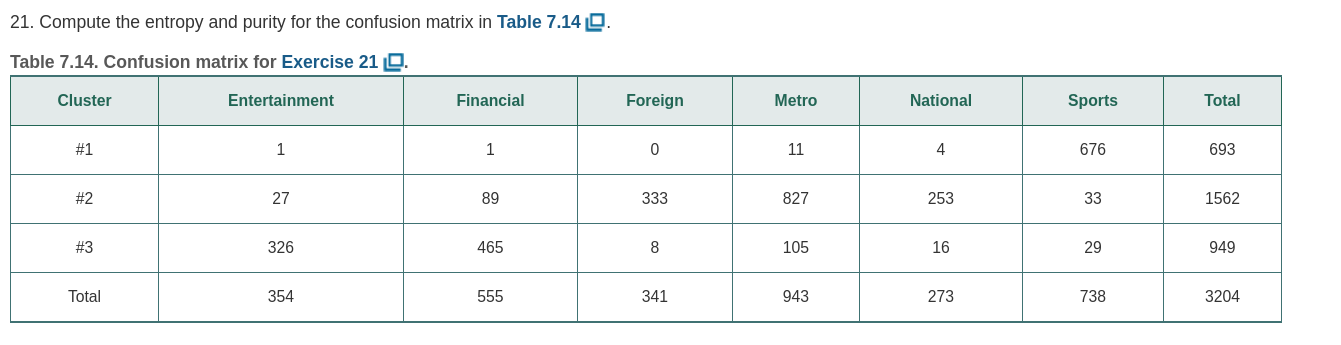

In [5]:
clusters= {
    1:{
        693:[1, 1, 0, 11, 4, 676]
    },
    2:{
        1562:[27, 89, 333, 827, 253, 33]
    },
    3:{
        949:[326, 465, 8, 105, 16, 29]
    }
}

for cluster, data in clusters.items():
    for k, v in data.items():
        print("\nCluster",cluster, "\npurity:", cluster_purity(v, k), "\nentropy:", cluster_entropy(v, k))
    


Cluster 1 
purity: 0.9754689754689755 
entropy: 0.19998968538141734

Cluster 2 
purity: 0.529449423815621 
entropy: 1.8407475570662515

Cluster 3 
purity: 0.48998946259220233 
entropy: 1.6964096745123303


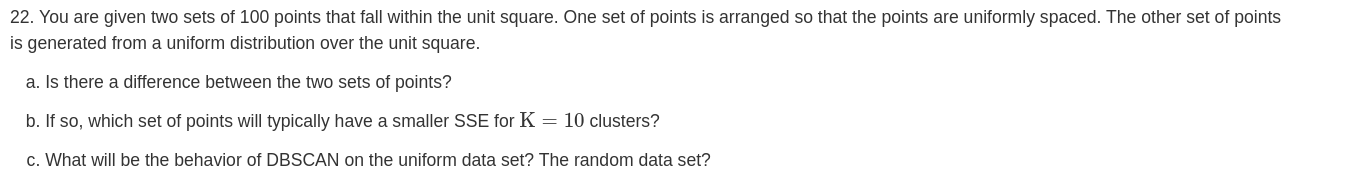

### a)

Yes, the points that are generated over a uniform distribution will have clusterings of dense and less dense areas, while the uniformly spaced points will all be the same distance apart, no clusterings

### b)

Probably the generated points from a uniform distribution, because, there will actually be clusters

### c)

For the uniform data set, it will merge every point into one cluster or it will classify everything as noise, depending on the distance threshhold value, for the random, set it will find clusters in the random variance

## Practicum Problems

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.datasets import load_boston, load_wine
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score

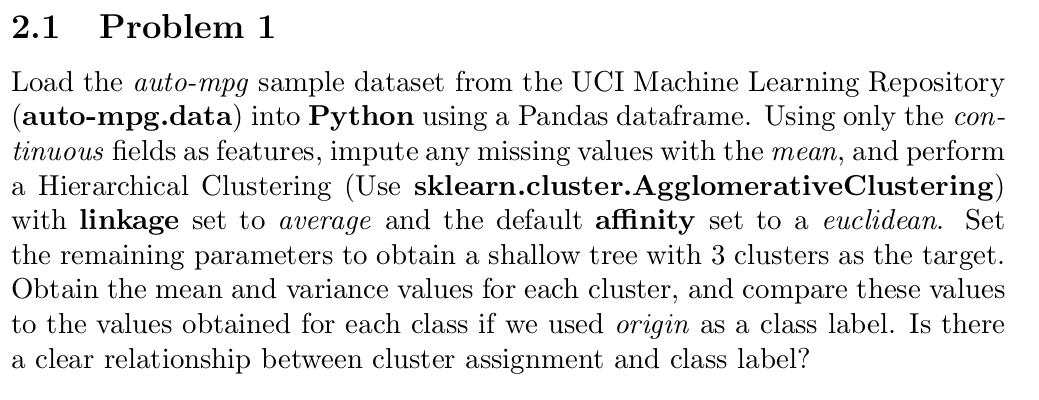

### Reading in auto-mpg data
### Removing non-continuous features
### Imputing missing values with the mean

In [7]:
path = r'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
df = pd.read_csv(path, delim_whitespace = True)
df = df.replace("?", np.NaN)
df.columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year",
             "origin", "car_name"]
auto_df = df[["mpg", "displacement", "horsepower", "weight", "acceleration"]]


imp = SimpleImputer(missing_values = np.NaN, strategy='mean')
imp = imp.fit(auto_df)
auto_df = imp.transform(auto_df)
auto_df = pd.DataFrame(auto_df)
auto_df.columns = ["mpg", "displacement", "horsepower", "weight", "acceleration"]
cls = df[["origin"]]

### Creating and fitting Agglomerative Cluster model onto to continuous features of auto-mpg dataset

In [8]:
model = AgglomerativeClustering(linkage='average', affinity='euclidean', n_clusters=3)
results = model.fit(auto_df)
labels = results.labels_
origin = []
for idx, row in df.iterrows():
    origin.append(row["origin"])

origin = np.array(origin)
auto_df["origin"] = origin
auto_df["cluster_id"] = labels
both = zip(labels, origin)
grouped_by_origin = auto_df[["mpg", "displacement", "horsepower", "weight", "acceleration", "origin"]].groupby(by=["origin"])
grouped_by_cluster = auto_df[["mpg", "displacement", "horsepower", "weight", "acceleration", "cluster_id"]].groupby(by=["cluster_id"])


In [9]:
print("MEAN BY CLASS ORIGIN")
print(grouped_by_origin.mean())
print("\nMEAN BY CLUSTER ID")
print(grouped_by_cluster.mean())

MEAN BY CLASS ORIGIN
              mpg  displacement  horsepower       weight  acceleration
origin                                                                
1       20.091935    245.655242  118.768614  3361.358871     15.045968
2       27.891429    109.142857   81.240117  2423.300000     16.787143
3       30.450633    102.708861   79.835443  2221.227848     16.172152

MEAN BY CLUSTER ID
                  mpg  displacement  horsepower       weight  acceleration
cluster_id                                                                
0           27.365414    131.934211   84.298589  2459.511278     16.298120
1           13.889062    358.093750  167.046875  4398.593750     13.025000
2           17.502985    278.567164  124.388060  3626.641791     15.152239


We can see that the mean, for each feature when grouped by Origin vs ID, doesnt show too much, insight, but we can see for example, the mean acceleration between clusters and origin classes are all very close to each other, compared ot the other features, and we can pretty much consider it as noise.

In [10]:
print("VARIANCE BY CLASS ORIGIN")
print(grouped_by_origin.var())
print("\nVARIANCE BY CLUSTER ID")
print(grouped_by_cluster.var())

VARIANCE BY CLASS ORIGIN
              mpg  displacement   horsepower         weight  acceleration
origin                                                                   
1       41.145360   9726.719729  1575.408439  634170.554901      7.561846
2       45.211230    509.950311   410.571987  240142.328986      9.276209
3       37.088685    535.465433   317.523856  102718.485881      3.821779

VARIANCE BY CLUSTER ID
                  mpg  displacement  horsepower         weight  acceleration
cluster_id                                                                  
0           41.976309   2828.083391  369.083949  182632.099872      5.718298
1            3.359085   2138.213294  756.521577   74312.340278      3.591429
2            8.959991   2914.097693  723.422886   38123.627318     10.568593


We can see that there is low variance in clusters 1 and 2 for mpg, and this shows that it was probably a strong factor in splitting between cluster 0 and clusters 1 and 2. Again we see little variation in acceleration accross all clusters and origin classes, and can call it noise.

In [11]:
categories = {
    0:[],
    1:[],
    2:[]
}
for lbl, orgn in both:
    categories[lbl].append(orgn)

print(" Origin:", "1".ljust(3), "2".ljust(3), "3".ljust(3))
print("-------------------")
print("Class 0:", str(categories[0].count(1)).ljust(3), str(categories[0].count(2)).ljust(3), str(categories[0].count(3)).ljust(3))
print("Class 1:", str(categories[1].count(1)).ljust(3), str(categories[1].count(2)).ljust(3), str(categories[1].count(3)).ljust(3))
print("Class 2:", str(categories[2].count(1)).ljust(3), str(categories[2].count(2)).ljust(3), str(categories[2].count(3)).ljust(3))

 Origin: 1   2   3  
-------------------
Class 0: 120 67  79 
Class 1: 64  0   0  
Class 2: 64  3   0  


- We can see that by choosing 3 clusters, we do not neccesarily get 3 distinct clusters that match up 1 to 1 with the target class variable origin.
- However... we can clearly see that almost every object that belonged to either Origin 2 or 3, belongs to class 0.
- This means Clusters 1 and 2 were probably sub-clusters that contained points that did not have attributes that would most likely lead to it of having origin 2 or 3

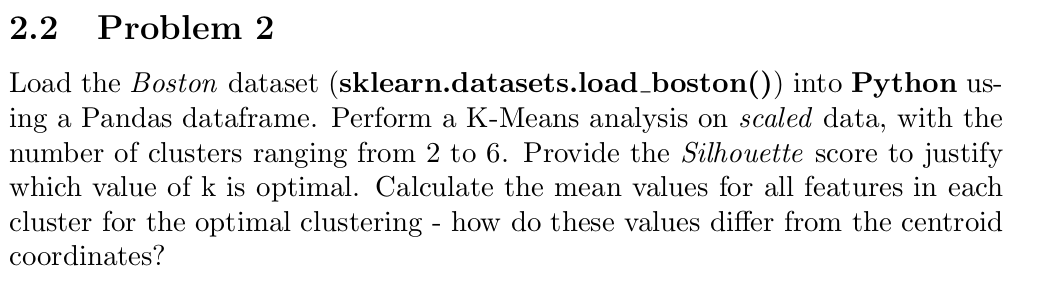

### Scaling boston_data with range 0,1 on all columns

In [12]:
data = load_boston()
bstn_df = pd.DataFrame(data.data, columns=data.feature_names)
scaler = MinMaxScaler()
scaler.fit(bstn_df)
bstn_df = pd.DataFrame(scaler.transform(bstn_df), columns=data.feature_names)

2 clusters silhouette_score: 0.4283539950397875
3 clusters silhouette_score: 0.3110514683967143
4 clusters silhouette_score: 0.32080293366970253
5 clusters silhouette_score: 0.3297997671608268
6 clusters silhouette_score: 0.30916602158690965
7 clusters silhouette_score: 0.30615102009921147


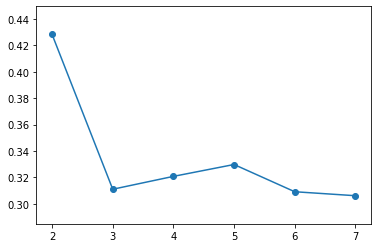

In [13]:
x = [2, 3, 4, 5, 6, 7]
y = []
for k in x:
    model = KMeans(n_clusters=k)
    results = model.fit_predict(bstn_df)
    score =silhouette_score(bstn_df,results)
    y.append(score)
    print(k, "clusters silhouette_score:",score)

plt.scatter(x, y)
plt.plot(x, y)

- It seems as if using 3 clusters would be optimal as it is the "elbow in the curve" and provides us the lowest silhoutte score for the least amount of clusters

In [14]:
best_k  = 3
bstn_copy = bstn_df.copy()
optimal_cluster = KMeans(n_clusters = best_k)
results = optimal_cluster.fit_predict(bstn_copy)
bstn_copy["cluster_id"] = results

print("CENTROID COORDINATES:\n\n",optimal_cluster.cluster_centers_)
print("\nMEAN FOR EACH FEATURE BY CLUSTER:")
bstn_copy.groupby(by="cluster_id").mean()

CENTROID COORDINATES:

 [[7.33158115e-03 1.93684211e-02 4.08311468e-01 1.10526316e-01
  3.90480832e-01 5.16879620e-01 8.30787577e-01 1.70053044e-01
  1.58810069e-01 2.77973082e-01 5.69652856e-01 9.40259880e-01
  3.18935169e-01]
 [1.39175844e-01 2.35922393e-16 6.57020873e-01 5.88235294e-02
  5.87554466e-01 4.68553814e-01 8.97172412e-01 8.40657367e-02
  9.74424552e-01 9.16647957e-01 8.08197747e-01 7.31102581e-01
  4.68644494e-01]
 [1.07999159e-03 2.99000000e-01 1.72794477e-01 3.33333333e-02
  1.25442387e-01 5.67418194e-01 3.46527063e-01 4.38343937e-01
  1.41062802e-01 2.00879983e-01 5.39184397e-01 9.81088865e-01
  1.56553532e-01]]

MEAN FOR EACH FEATURE BY CLUSTER:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
cluster_id,,,,,,,,,,,,,
0,0.007332,0.019368,0.408311,0.110526,0.390481,0.516880,0.830788,0.170053,0.158810,0.277973,0.569653,0.940260,0.318935
1,0.139176,0.000000,0.657021,0.058824,0.587554,0.468554,0.897172,0.084066,0.974425,0.916648,0.808198,0.731103,0.468644
2,0.001080,0.299000,0.172794,0.033333,0.125442,0.567418,0.346527,0.438344,0.141063,0.200880,0.539184,0.981089,0.156554


The means for each each feature of all clusters are actually the same as the centroid coordinates

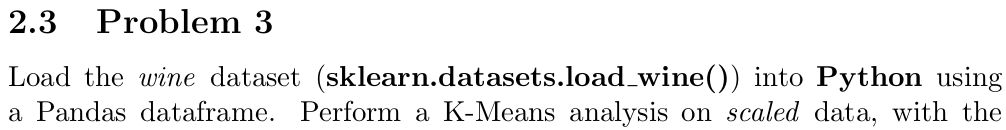

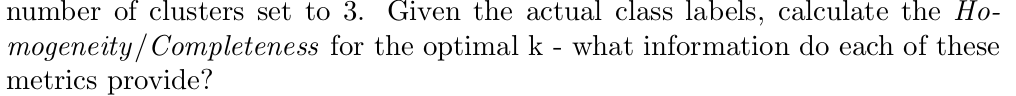

In [15]:
wine_data = load_wine()
wine_df = pd.DataFrame(wine_data.data, columns= wine_data.feature_names)
scaler = MinMaxScaler()
scaler.fit(wine_df)
wine_df = pd.DataFrame(scaler.transform(wine_df), columns =wine_data.feature_names)
rows = wine_df.shape[0]
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [16]:
k_clusters = 3
model = KMeans(n_clusters=k_clusters)
results = model.fit_predict(wine_df)
print("homogeneity score:",homogeneity_score(results, wine_data.target))
print("completeness score:",completeness_score(results, wine_data.target))



homogeneity score: 0.8373840744241512
completeness score: 0.8460200607112434


Homogenity score represents how close a cluster(s) are to containing objects from only one class,
Completeness score is ratio of objects 